In [1]:
import numpy as np
import pandas as pd

In [2]:
Co2_data=pd.read_csv(r'fossil-fuel-co2-emissions-by-nation.csv')

In [3]:
Co2_data.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


In [4]:
Co2_data.shape

(17232, 10)

In [5]:
Co2_data.isna().sum()

Year                           0
Country                        0
Total                          0
Solid Fuel                     0
Liquid Fuel                    0
Gas Fuel                       0
Cement                         0
Gas Flaring                    0
Per Capita                     0
Bunker fuels (Not in Total)    0
dtype: int64

In [6]:
Co2_data.dtypes

Year                             int64
Country                         object
Total                            int64
Solid Fuel                       int64
Liquid Fuel                      int64
Gas Fuel                         int64
Cement                           int64
Gas Flaring                      int64
Per Capita                     float64
Bunker fuels (Not in Total)      int64
dtype: object

In [7]:
Co2_data['Total']=Co2_data['Total']+Co2_data['Bunker fuels (Not in Total)']

In [8]:
Co2_data.tail(5)

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
17227,2014,VIET NAM,46278,19246,12694,5349,8229,0,0.49,761
17228,2014,WALLIS AND FUTUNA ISLANDS,7,0,6,0,0,0,0.44,1
17229,2014,YEMEN,6343,137,5090,581,381,0,0.24,153
17230,2014,ZAMBIA,1261,132,797,0,299,0,0.08,33
17231,2014,ZIMBABWE,3287,2097,1005,0,177,0,0.22,9


In [9]:
Co2_data.duplicated().sum()

0

In [10]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Co2_data['Country']=lb.fit_transform(Co2_data['Country'])

C:\Users\NAYUDU.B\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

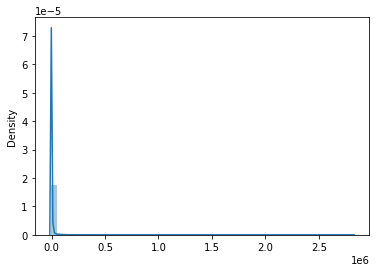

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(Co2_data)

In [12]:
col=Co2_data[['Country','Total','Solid Fuel',
              'Liquid Fuel','Gas Fuel','Cement',
              'Gas Flaring','Per Capita',
              'Bunker fuels (Not in Total)']]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Co2_data[['Country','Total','Solid Fuel',
              'Liquid Fuel','Gas Fuel','Cement',
              'Gas Flaring','Per Capita',
              'Bunker fuels (Not in Total)']]=scaler.fit_transform(col)

In [14]:
Co2_data.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,1.499124,-0.180476,-0.137248,-0.194309,-0.153992,-0.096286,-0.18359,-0.413715,-0.232093
1,1752,1.499124,-0.180467,-0.137232,-0.194309,-0.153992,-0.096286,-0.18359,-0.413715,-0.232093
2,1753,1.499124,-0.180467,-0.137232,-0.194309,-0.153992,-0.096286,-0.18359,-0.413715,-0.232093
3,1754,1.499124,-0.180458,-0.137216,-0.194309,-0.153992,-0.096286,-0.18359,-0.413715,-0.232093
4,1755,1.499124,-0.180450,-0.137200,-0.194309,-0.153992,-0.096286,-0.18359,-0.413715,-0.232093


C:\Users\NAYUDU.B\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


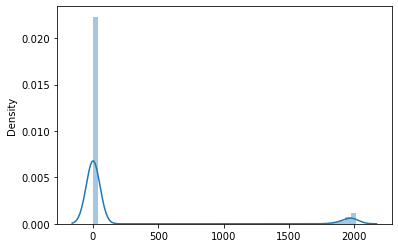

In [15]:
sns.distplot(Co2_data)
plt.show()

In [16]:
Co2_data.head(3)

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,1.499124,-0.180476,-0.137248,-0.194309,-0.153992,-0.096286,-0.18359,-0.413715,-0.232093
1,1752,1.499124,-0.180467,-0.137232,-0.194309,-0.153992,-0.096286,-0.18359,-0.413715,-0.232093
2,1753,1.499124,-0.180467,-0.137232,-0.194309,-0.153992,-0.096286,-0.18359,-0.413715,-0.232093


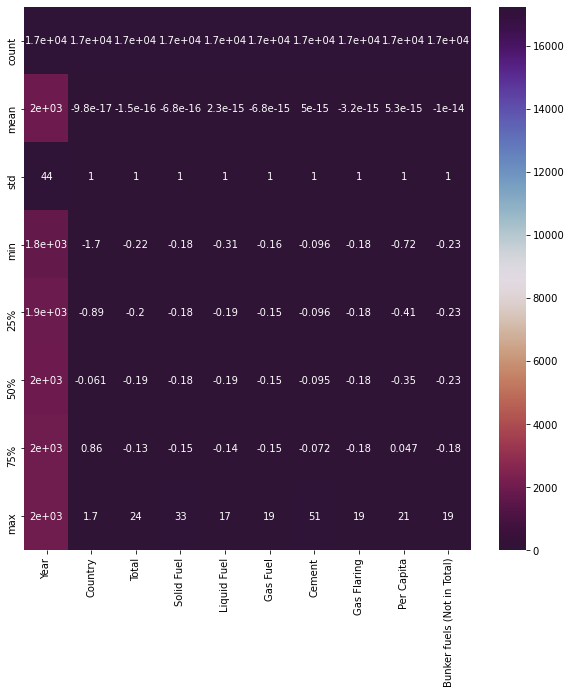

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(Co2_data.describe(),cmap='twilight_shifted_r',annot=True)
plt.show()

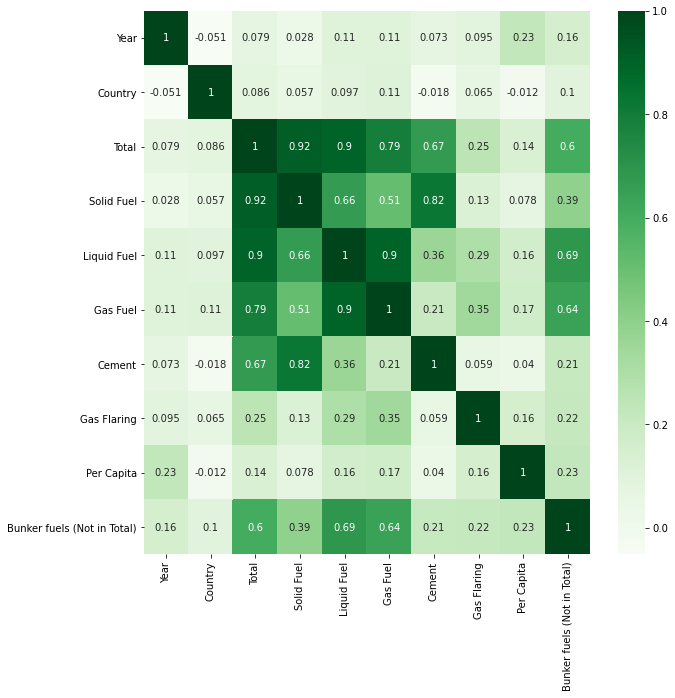

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(Co2_data.corr(),cmap='Greens',annot=True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(Co2_data.iloc[:,[3,4,5,6,7,8,9]],Co2_data.iloc[:,2])

In [21]:
svr=SVR(kernel='rbf',
    degree=3,
    gamma='auto',
    coef0=0.0,
    tol=0.001,
    C=20,
   )

In [22]:
svr.fit(X_train,Y_train)

SVR(C=20, gamma='auto')

In [23]:
m_pred=svr.predict(X_test)

In [24]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,confusion_matrix

In [25]:
r2_score(Y_test,m_pred)

0.9831029482892526

In [26]:
mean_squared_error(Y_test,m_pred)

0.014430820563870956

In [27]:
mean_absolute_error(Y_test,m_pred)

0.05791686831063242

C:\Users\NAYUDU.B\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


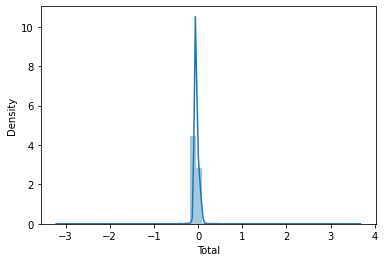

In [28]:
sns.distplot(Y_test-m_pred)
plt.show()

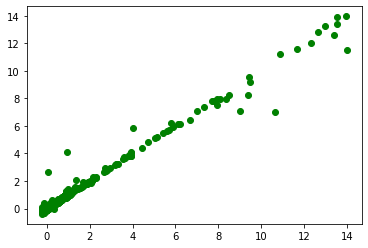

In [29]:
plt.scatter(Y_test,m_pred,c='g')
plt.show()